# K-means Clustering to create the dataset

## Data Processing

###Reading data into dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#csv_file = 'final_interaction_features.csv'
interaction_dataset = pd.read_csv('/content/drive/MyDrive/BME230A stuff/final_interaction_features (1).csv')

print(interaction_dataset.shape)
interaction_dataset.head()

(417529, 159)


,phage,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,I_avg_p,K_avg_p,...,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h,interaction
0,NC_019549,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,...,0.000491,0.000118,0.000195,4.800398e+08,9.549443e+05,3.740120e+06,239754.935654,73093.083415,64.196779,0
1,NC_019549,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,...,0.000439,0.000063,0.000245,4.784298e+08,9.642027e+05,3.739048e+06,242712.727923,66114.196438,56.505266,0
2,NC_019549,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,...,0.000548,0.000077,0.000388,6.341924e+08,1.222810e+06,4.903032e+06,352905.460828,90684.280618,47.748971,0
3,NC_019549,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,...,0.000651,0.000163,0.000187,3.524275e+08,7.184049e+05,2.832550e+06,168743.578738,55870.203565,17.641437,0
4,NC_019549,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,...,0.000684,0.000165,0.000155,3.912773e+08,7.552252e+05,3.082037e+06,206028.614236,64061.811764,33.260368,0


In [ ]:
num_features = interaction_dataset.shape[1]
num_instances = interaction_dataset.shape[0]

print("Number of features:", num_features)
print("Number of instances:", num_instances)

Number of features: 159
Number of instances: 417529


###Remove Missing Values

In [ ]:
missing_values = interaction_dataset.isna().sum()
missing_values = missing_values[missing_values != 0]
for column, count in missing_values.items():
    print("For", column, "missing number:",  count)

For A_std_p missing number: 581
For C_std_p missing number: 581
For D_std_p missing number: 581
For E_std_p missing number: 581
For F_std_p missing number: 581
For G_std_p missing number: 581
For H_std_p missing number: 581
For I_std_p missing number: 581
For K_std_p missing number: 581
For L_std_p missing number: 581
For M_std_p missing number: 581
For N_std_p missing number: 581
For P_std_p missing number: 581
For Q_std_p missing number: 581
For R_std_p missing number: 581
For S_std_p missing number: 581
For T_std_p missing number: 581
For V_std_p missing number: 581
For W_std_p missing number: 581
For Y_std_p missing number: 581
For MolW_std_p missing number: 581
For C-_std_p missing number: 581
For H-_std_p missing number: 581
For O-_std_p missing number: 581
For N-_std_p missing number: 581
For S-_std_p missing number: 581
For A_var_p missing number: 581
For C_var_p missing number: 581
For D_var_p missing number: 581
For E_var_p missing number: 581
For F_var_p missing number: 581


In [ ]:
interaction_dataset = interaction_dataset.dropna()
num_features = interaction_dataset.shape[1]
num_instances = interaction_dataset.shape[0]

print("Number of features:", num_features)
print("Number of instances:", num_instances)

Number of features: 159
Number of instances: 403788


In [ ]:
missing_values = interaction_dataset.isna().sum()
missing_values

phage          0
A_avg_p        0
C_avg_p        0
D_avg_p        0
E_avg_p        0
              ..
H-_var_h       0
O-_var_h       0
N-_var_h       0
S-_var_h       0
interaction    0
Length: 159, dtype: int64

###Normalizing the data

In [ ]:
interaction_dataset.dtypes

phage           object
A_avg_p        float64
C_avg_p        float64
D_avg_p        float64
E_avg_p        float64
                ...   
H-_var_h       float64
O-_var_h       float64
N-_var_h       float64
S-_var_h       float64
interaction      int64
Length: 159, dtype: object

In [ ]:
#Only normalize float data
extracted_columns = ['phage', 'host', 'interaction']
extracted_phages_hosts = interaction_dataset[extracted_columns]

interaction_data = interaction_dataset.select_dtypes(include=['float64']).columns
extracted_interaction_data = interaction_dataset[interaction_data]
#extracted_interaction_data = extracted_interaction_data.drop(columns=['interaction'])
extracted_interaction_data.head()

,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,I_avg_p,K_avg_p,L_avg_p,...,T_var_h,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h
0,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,0.094,...,0.000305,0.000491,0.000118,0.000195,4.800398e+08,9.549443e+05,3.740120e+06,239754.935654,73093.083415,64.196779
1,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,0.094,...,0.000254,0.000439,0.000063,0.000245,4.784298e+08,9.642027e+05,3.739048e+06,242712.727923,66114.196438,56.505266
2,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,0.094,...,0.000414,0.000548,0.000077,0.000388,6.341924e+08,1.222810e+06,4.903032e+06,352905.460828,90684.280618,47.748971
3,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,0.094,...,0.000301,0.000651,0.000163,0.000187,3.524275e+08,7.184049e+05,2.832550e+06,168743.578738,55870.203565,17.641437
4,0.063511,0.012748,0.057333,0.073084,0.038886,0.058035,0.024105,0.054352,0.086162,0.094,...,0.000495,0.000684,0.000165,0.000155,3.912773e+08,7.552252e+05,3.082037e+06,206028.614236,64061.811764,33.260368


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_interaction_dataset = scaler.fit_transform(extracted_interaction_data)

df_normalized_interaction_dataset = pd.DataFrame(normalized_interaction_dataset, columns=extracted_interaction_data.columns)
df_normalized_interaction_dataset.head()

df_normalized_interaction_dataset.reset_index(drop=True, inplace=True)
extracted_phages_hosts.reset_index(drop=True, inplace=True)

final_df = pd.concat([extracted_phages_hosts, df_normalized_interaction_dataset], axis=1)
final_df.head()

,phage,host,interaction,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,...,T_var_h,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h
0,NC_019549,CP012598,0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,...,0.296888,0.141628,0.197217,0.304589,0.001619,0.001650,0.001551,0.001503,0.001522,0.008843
1,NC_019549,CP013614,0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,...,0.232885,0.103086,0.043076,0.470144,0.001608,0.001681,0.001550,0.001539,0.001245,0.007382
2,NC_019549,AP006716,0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,...,0.436610,0.184783,0.080809,0.940057,0.002613,0.002545,0.002499,0.002861,0.002220,0.005719
3,NC_019549,AP017920,0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,...,0.292214,0.261958,0.321349,0.278107,0.000796,0.000860,0.000811,0.000651,0.000838,0.000000
4,NC_019549,AP017894,0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,...,0.540506,0.286628,0.326108,0.169735,0.001046,0.000983,0.001014,0.001098,0.001163,0.002967


In [ ]:
missing_values = final_df.isna().sum()
missing_values = missing_values[missing_values != 0]
for column, count in missing_values.items():
    print("For", column, "missing number:",  count)

Extract into positive and negative datapoints

In [ ]:
positive_df = final_df[final_df['interaction'] == 1]
negative_df = final_df[final_df['interaction'] == 0]

print("Positive class:")
print(positive_df.shape)

print("\nNegative class:")
print(negative_df.shape)

Positive class:
(2591, 159)

Negative class:
(401197, 159)


## Determine optimum K for K-means

Determining best number for clusters using the elbow method:

In [ ]:
#Get data ready for kmeans (only numerical data)
extracted_columns = ['phage', 'host', 'interaction']
negative_phages_hosts = negative_df[extracted_columns]
negative_interaction_data = negative_df.drop(columns=extracted_columns)
negative_interaction_data.head()

,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,I_avg_p,K_avg_p,L_avg_p,...,T_var_h,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h
0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.296888,0.141628,0.197217,0.304589,0.001619,0.001650,0.001551,0.001503,0.001522,0.008843
1,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.232885,0.103086,0.043076,0.470144,0.001608,0.001681,0.001550,0.001539,0.001245,0.007382
2,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.436610,0.184783,0.080809,0.940057,0.002613,0.002545,0.002499,0.002861,0.002220,0.005719
3,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.292214,0.261958,0.321349,0.278107,0.000796,0.000860,0.000811,0.000651,0.000838,0.000000
4,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.540506,0.286628,0.326108,0.169735,0.001046,0.000983,0.001014,0.001098,0.001163,0.002967


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss_values = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(negative_interaction_data)
    wcss_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

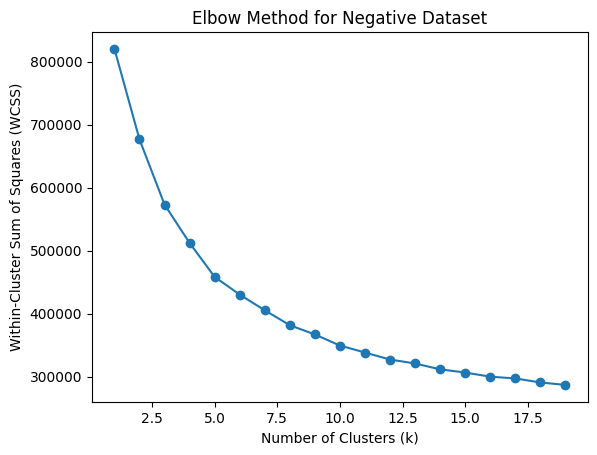

In [ ]:
# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Negative Dataset')
plt.show()

With the curve above, we choose the best value of k

In [ ]:
k_optimal = 7

## K-Means Clustering

With the best value for k, running k means clusters to get optimum number of clusters.

In [ ]:
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(negative_interaction_data)

cluster_labels = kmeans.labels_
cluster_distances = kmeans.transform(negative_interaction_data)

negative_df['cluster'] = cluster_labels
negative_interaction_data['cluster'] = cluster_labels
negative_interaction_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-d9be68629909>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['cluster'] = cluster_labels


,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,I_avg_p,K_avg_p,L_avg_p,...,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h,cluster
0,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.141628,0.197217,0.304589,0.001619,0.001650,0.001551,0.001503,0.001522,0.008843,0
1,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.103086,0.043076,0.470144,0.001608,0.001681,0.001550,0.001539,0.001245,0.007382,6
2,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.184783,0.080809,0.940057,0.002613,0.002545,0.002499,0.002861,0.002220,0.005719,6
3,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.261958,0.321349,0.278107,0.000796,0.000860,0.000811,0.000651,0.000838,0.000000,3
4,0.212689,0.41234,0.38748,0.6248,0.27677,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.286628,0.326108,0.169735,0.001046,0.000983,0.001014,0.001098,0.001163,0.002967,3


In [ ]:
cluster_counts = negative_interaction_data['cluster'].value_counts()

# Print the counts for each value
for value, count in cluster_counts.items():
    print(f"Cluster {value}: {count} datapoints")

Cluster 1: 121426 datapoints
Cluster 3: 100571 datapoints
Cluster 6: 90132 datapoints
Cluster 0: 50235 datapoints
Cluster 5: 18182 datapoints
Cluster 4: 17824 datapoints
Cluster 2: 2827 datapoints


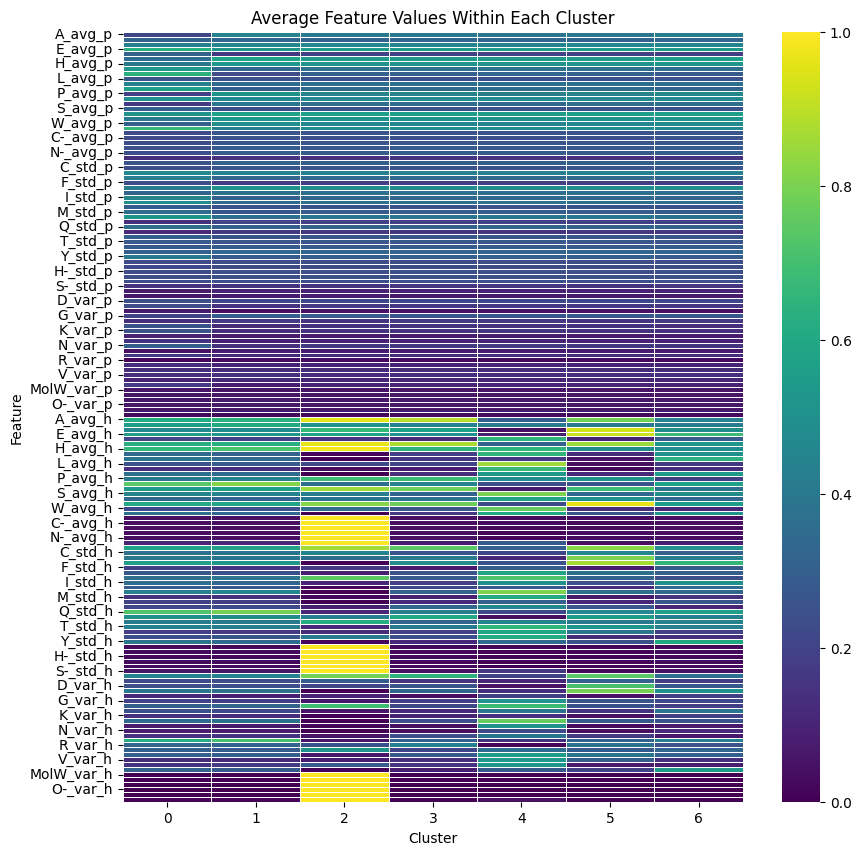

In [ ]:
import seaborn as sns

# Compute the average feature values for each cluster
cluster_avg =  negative_interaction_data.groupby('cluster').mean()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_avg.T, cmap='viridis', annot=False, fmt=".2f", linewidths=.5)
plt.title('Average Feature Values Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

## Extracting diverse data from clusters

First thing we want to sort the instances into their respective clusters based on distance from the centroid

In [ ]:
import numpy as np

selected_data = {}

for cluster_label in np.unique(cluster_labels):
    # Get the indices of data points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_label)[0]

    # Get the distances of data points in the current cluster to its centroid
    cluster_distances_to_centroid = cluster_distances[cluster_indices, cluster_label]

    # Sort the data points based on their distances to the centroid
    sorted_indices = np.argsort(cluster_distances_to_centroid)

    # Calculate the number of data points to select from the current cluster
    num_data_points = int(len(cluster_indices) * 0.2)

    print("Cluster", cluster_label, "representative size", num_data_points)

    # Select the proportional number of data points from the current cluster
    selected_data[cluster_label] = cluster_indices[sorted_indices[:num_data_points]]

# Extract the selected data points from the negative dataset
selected_data_points = negative_df.iloc[np.concatenate(list(selected_data.values()))]
selected_data_points_interaction_data = negative_interaction_data.iloc[np.concatenate(list(selected_data.values()))]


# Display the selected data points
selected_data_points.shape

Cluster 0 representative size 10047
Cluster 1 representative size 24285
Cluster 2 representative size 565
Cluster 3 representative size 20114
Cluster 4 representative size 3564
Cluster 5 representative size 3636
Cluster 6 representative size 18026


(80237, 160)

## Determining reliable negative points

We get the distance from the positive data points and sort them to help determine which would be the best highly negative datapoints.

In [ ]:
extracted_columns = ['phage', 'host', 'interaction']
positive_phages_hosts = positive_df[extracted_columns]
positive_interaction_data = positive_df.drop(columns=extracted_columns)
positive_interaction_data.head()

,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,I_avg_p,K_avg_p,L_avg_p,...,T_var_h,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h
32,0.212689,0.412340,0.387480,0.624800,0.276770,0.327964,0.638208,0.405209,0.654246,0.412923,...,0.243642,0.268399,0.078394,0.195560,0.002332,0.002385,0.002289,0.002139,0.002075,0.011457
135,0.361878,0.303820,0.507009,0.708892,0.242235,0.410852,0.426868,0.394628,0.326865,0.187566,...,0.303501,0.134439,0.125869,0.075507,0.002606,0.002620,0.002547,0.002579,0.002454,0.007215
287,0.399470,0.332363,0.481483,0.505365,0.346104,0.501711,0.343765,0.483017,0.274516,0.124178,...,0.317836,0.137922,0.230448,0.208919,0.001830,0.001844,0.001778,0.001691,0.001905,0.005199
387,0.389363,0.362995,0.396089,0.594545,0.244299,0.489378,0.499877,0.355217,0.357793,0.240814,...,0.317836,0.137922,0.230448,0.208919,0.001830,0.001844,0.001778,0.001691,0.001905,0.005199
463,0.130563,0.794535,0.219987,0.295521,0.666774,0.000000,0.721955,0.670784,0.500736,0.342127,...,0.534263,0.153255,0.574622,0.285205,0.000668,0.000957,0.000671,0.000327,0.000106,0.044781


In [ ]:
print(len(selected_data_points_interaction_data.to_numpy()))
print(len(positive_interaction_data.to_numpy()))
selected_data_points_interaction_data = selected_data_points_interaction_data.drop(columns=['cluster'])

80237
2591


In [ ]:
from sklearn.metrics import pairwise_distances


# Calculate the dissimilarity between each selected representative and all positive instances
dissimilarities = pairwise_distances(selected_data_points_interaction_data.to_numpy(), positive_interaction_data.to_numpy())

In [ ]:
print(len(dissimilarities), len(dissimilarities[0]))

80237 2591


In [ ]:
# Calculate the mean dissimilarity for each negative instance
mean_dissimilarities = np.mean(dissimilarities, axis=1)

# Rank the negative instances based on their mean dissimilarities
ranked_indices = np.argsort(mean_dissimilarities)[::-1]
print(ranked_indices)

[34893 34883 34879 ... 34902 34904 34939]


We choose the datapoints that are most dissimilar to the positive points

In [ ]:
# Initialize a list to store selected negative instances
desired_negative_instances_count = positive_df.shape[0]
selected_negative_instances = ranked_indices[:desired_negative_instances_count]
selected_negative_data_points = negative_df.iloc[selected_negative_instances]

cluster_counts = selected_negative_data_points['cluster'].value_counts()

# Print the counts for each value
for value, count in cluster_counts.items():
    print(f"Cluster {value}: {count} datapoints")

Cluster 3: 718 datapoints
Cluster 0: 653 datapoints
Cluster 6: 613 datapoints
Cluster 1: 401 datapoints
Cluster 4: 155 datapoints
Cluster 5: 51 datapoints


In [ ]:
selected_negative_data_points.head()

selected_negative_data_points = selected_negative_data_points.drop(columns=['cluster'])

In [ ]:
print(selected_negative_data_points.shape)
print(positive_df.shape)

(2591, 159)
(2591, 159)


## Create Balanced Dataset to use

In [ ]:
balanced_df = pd.concat([positive_df, selected_negative_data_points])
balanced_df

,phage,host,interaction,A_avg_p,C_avg_p,D_avg_p,E_avg_p,F_avg_p,G_avg_p,H_avg_p,...,T_var_h,V_var_h,W_var_h,Y_var_h,MolW_var_h,C-_var_h,H-_var_h,O-_var_h,N-_var_h,S-_var_h
32,NC_019549,CP004005,1,0.212689,0.412340,0.387480,0.624800,0.276770,0.327964,0.638208,...,0.243642,0.268399,0.078394,0.195560,0.002332,0.002385,0.002289,0.002139,0.002075,0.011457
135,MG198776,CP004353,1,0.361878,0.303820,0.507009,0.708892,0.242235,0.410852,0.426868,...,0.303501,0.134439,0.125869,0.075507,0.002606,0.002620,0.002547,0.002579,0.002454,0.007215
287,NC_026586,HG530068,1,0.399470,0.332363,0.481483,0.505365,0.346104,0.501711,0.343765,...,0.317836,0.137922,0.230448,0.208919,0.001830,0.001844,0.001778,0.001691,0.001905,0.005199
387,NC_026587,HG530068,1,0.389363,0.362995,0.396089,0.594545,0.244299,0.489378,0.499877,...,0.317836,0.137922,0.230448,0.208919,0.001830,0.001844,0.001778,0.001691,0.001905,0.005199
463,NC_024071,NC_014574,1,0.130563,0.794535,0.219987,0.295521,0.666774,0.000000,0.721955,...,0.534263,0.153255,0.574622,0.285205,0.000668,0.000957,0.000671,0.000327,0.000106,0.044781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58213,NC_008367,CP017101,0,0.342859,0.305692,0.385435,0.593919,0.168952,0.322115,0.375047,...,0.241498,0.066124,0.123318,0.165273,0.002006,0.002017,0.001974,0.001916,0.001957,0.006754
56955,MH171096,CP000628,0,0.423132,0.320744,0.474109,0.638020,0.142164,0.597035,0.508654,...,0.261311,0.047804,0.104592,0.103825,0.001754,0.001748,0.001724,0.001724,0.001689,0.006823
56762,NC_021867,CP007641,0,0.105751,0.325326,0.359884,0.570052,0.352782,0.250349,0.508405,...,0.235311,0.060059,0.129565,0.183991,0.001718,0.001706,0.001681,0.001711,0.001663,0.005896
58140,NC_015284,CP001047,0,0.231423,0.305145,0.464870,0.548160,0.370144,0.426038,0.466147,...,0.247634,0.034156,0.000000,0.359073,0.013512,0.013542,0.013740,0.013446,0.011961,0.004057


In [ ]:
balanced_df.to_csv('balanced_dataset2.csv', index=False)